In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
path = "C:\\Users\\iftik\\Downloads\\PREDICTING-LAPTOP-PRICES.csv"
df=pd.read_csv(path)

In [3]:
df


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [4]:
df.head() #return top 5 rows


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
df.shape #gives all attributes of dataset


(823, 19)

In [6]:
# checking the number of missing values in each column
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [7]:
#Check for missing values
df.isnull().values.any() 

np.False_

In [8]:
#dataset informationsdf.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [9]:
df.brand.value_counts()

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64

In [10]:

df.processor_name.value_counts()

processor_name
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 9          26
Ryzen 3          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

In [11]:
df=df.drop("msoffice",axis=1)

In [12]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,142990,3 stars,0,0


<BarContainer object of 823 artists>

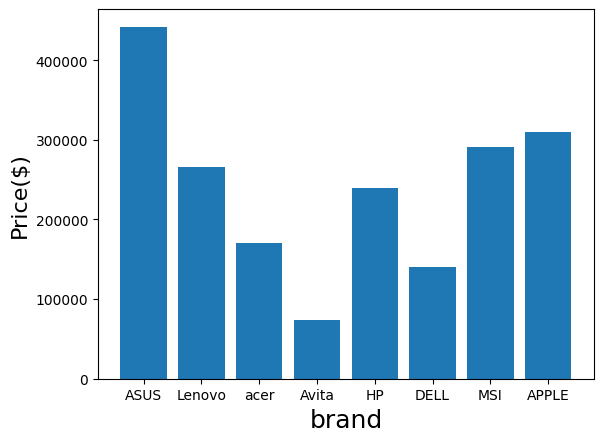

In [13]:

# All Brands
x = df['brand']
y = df['Price']

#Bar chart
plt.xlabel('brand', fontsize=18)
plt.ylabel('Price($)', fontsize=16)
plt.bar(x, y)


In [14]:
features=df["os"].value_counts()

In [15]:
features

os
Windows    779
Mac         28
DOS         16
Name: count, dtype: int64

In [16]:
#from sklearn.preprocessing import LabelEncoder

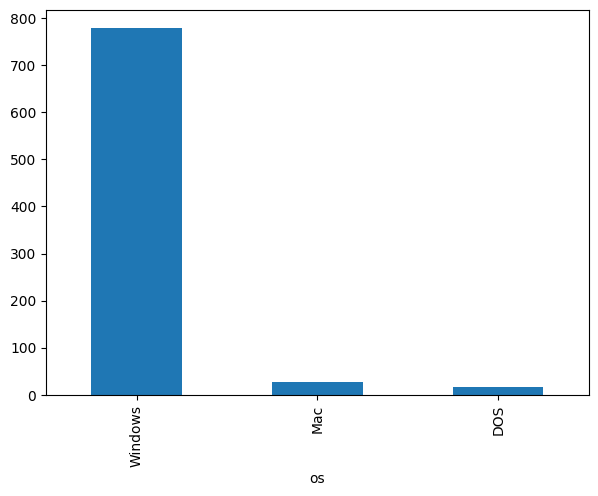

In [17]:
plt.figure(figsize=(7,5))
features.plot(kind="bar")
plt.show()

In [18]:
columns_to_encode= [col for col in df.columns if col !='Price']
columns_to_encode

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'rating',
 'Number of Ratings',
 'Number of Reviews']

In [19]:

from sklearn.preprocessing import LabelEncoder

# Encode each column
le=LabelEncoder()
for column in columns_to_encode:
    df[column]=le.fit_transform(df[column])

# Print the encoded dataset
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,34649,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,38999,2,58,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,39999,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,69990,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,26990,2,0,0


In [20]:
# Split data into features (X) and target (y)
y=df['Price']
X=df.drop('Price',axis=1)
X.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,2,58,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,2,0,0


# TRAIN TEST SPLIT

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Applying and evaluating models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Displaying results
results_df = pd.DataFrame(results).T
print(results_df)

                                         MAE           MSE          RMSE  \
Linear Regression               18511.420831  9.019387e+08  30032.293630   
Ridge Regression                18490.263716  9.004413e+08  30007.353954   
Lasso Regression                18510.532322  9.018848e+08  30031.397024   
Support Vector Regression       29868.237524  2.106913e+09  45901.120760   
Decision Tree Regression        16269.297980  9.688594e+08  31126.507098   
Random Forest Regression        13290.444703  7.014691e+08  26485.261593   
Gradient Boosting Regression    14108.316960  7.128719e+08  26699.661658   
AdaBoost Regression             25931.476899  1.021710e+09  31964.206362   
K-Nearest Neighbors Regression  15679.500606  8.366690e+08  28925.231133   

                                      R2  
Linear Regression               0.537184  
Ridge Regression                0.537953  
Lasso Regression                0.537212  
Support Vector Regression      -0.081130  
Decision Tree Regression

In [26]:
# Select the best model based on RMSE
best_model_name = results_df['RMSE'].idxmin()
best_model_metrics = results_df.loc[best_model_name]

print(f"\nBest model: {best_model_name}")
print(best_model_metrics)


Best model: Random Forest Regression
MAE     1.329044e+04
MSE     7.014691e+08
RMSE    2.648526e+04
R2      6.400520e-01
Name: Random Forest Regression, dtype: float64
